# 1. Carga de Datos y Evaluacion Superficial de Ambos DataFrames

In [1]:
# Librerias

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

# Carga de los datos:
df1 = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 8/project_sql_result_01.csv')
df2 = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 8/project_sql_result_04.csv')
df3 = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 8/project_sql_result_07.csv')

In [2]:
# tanto los titulos como el tipo de datos parecen ser correctos para el uso posterior.
print(df1.info())
display(df1.head(1))
display(df1.describe())

# tanto los titulos como el tipo de datos parecen ser correctos para el uso posterior.
print(df2.info())
display(df2.head(1))
display(df2.describe())

# tanto los titulos como el tipo de datos parecen ser correctos para el uso posterior.
df3.info()
display(df3.head(1))
display(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


,company_name,trips_amount
0,Flash Cab,19558


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


,dropoff_location_name,average_trips
0,Loop,10727.466667


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


# 2. Analisis Y Graficas

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


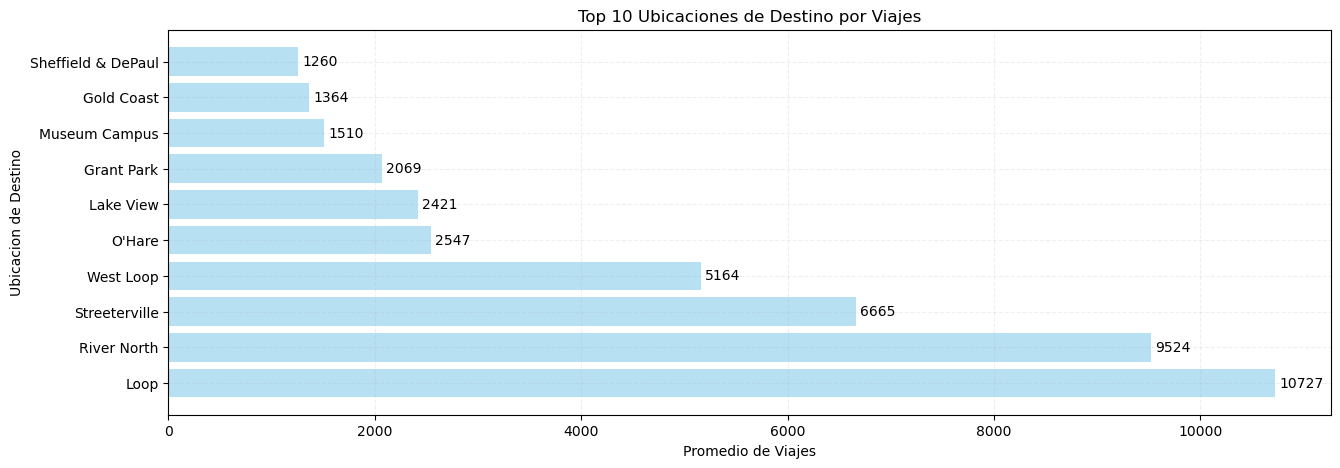

El top 4 de ubicaciones representa un: 56.88% con respecto del total.


In [4]:
# 1. Identificacion de los 10 principales barrios en terminos de finalizacion del recorrido.
# Primero identificamos los barrios segun su media. De la mas alta a la mas baja

top10 = df2[['dropoff_location_name','average_trips']].sort_values(by = 'average_trips',ascending = False).head(10)
display(top10)

# Segundo Graficamos para que el usuario final pueda identificar de manera rapida
# y agradable los datos.

# Aqui preparo los datos para el grafico.
names1 = top10['dropoff_location_name']
values1 = top10['average_trips']

# Creacion del grafico
plt.figure(figsize=(15, 5))
graf0 = plt.barh(names1, values1, color = 'skyblue', alpha = 0.6)

# Este codigo etiqueta los valores de cada barra individualmente a lo largo del grafico
for bar in graf0:
    ancho0 = bar.get_width()
    plt.annotate(
        f'{ancho0:.0f}',
        xy=(ancho0, bar.get_y() + bar.get_height()/2),
        xytext = (3, 0),
        textcoords = 'offset points',
        ha='left',
        va='center'
    )

# Aqui edito algunos valores del grafico
plt.grid(True, linestyle = '--', alpha = 0.2)
plt.xlabel('Promedio de Viajes')
plt.ylabel('Ubicacion de Destino')
plt.title('Top 10 Ubicaciones de Destino por Viajes')
plt.show()

# Porcentaje que representan los top 4 ubicaciones con respecto al total:
los4 = ['Loop','River North', 'Streeterville', 'West Loop']
top4 = df2[df2['dropoff_location_name'].isin(los4)]

# Numerador y denominador para determinar proporcion.
num1 = top4['average_trips'].sum()
den1 = df2['average_trips'].sum()

# Determino la porporcion.
print(f'El top 4 de ubicaciones representa un: {(num1/den1)*100:.2f}% con respecto del total.')

64


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


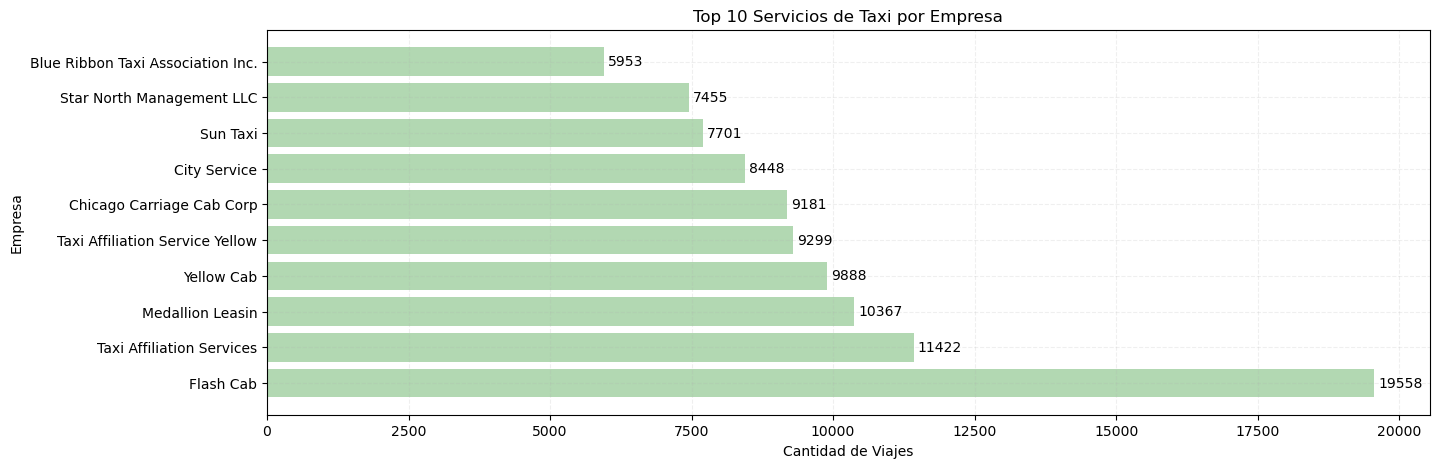

La empresa "Flash Cab" representa un: 14.24% con respecto del total de viajes.
El top 10 empresas representa un 72.30% de todos los viajes.


In [6]:
# Hay un total de 64 empresas, considero que una buena muestra seriea el top 20 de empresas segun numero de viajes completados.
# Esto representa 1/3 del total.

# Aqui creo un top 10 de empresas para la futura grafica.
print(df1['company_name'].nunique())
top10empresas = df1[['company_name','trips_amount']].sort_values(by = 'trips_amount',ascending = False).head(10)
display(top10empresas)

# Aqui la grafica para rapida identificacion de los valores.

#preparo los datos para la grafica
names2 = top10empresas['company_name']
values2 = top10empresas['trips_amount']

# Creacion de la Grafica
plt.figure(figsize=(15,5))
graf1 = plt.barh(names2, values2, alpha = 0.3, color = 'green')

# Este codigo etiqueta los valores de cada barra individualmente a lo largo del grafico
for bar in graf1:
    ancho = bar.get_width()
    plt.annotate(
        f'{ancho}', 
        xy = (ancho, bar.get_y() + bar.get_height()/2),
        xytext = (3, 0),
        textcoords='offset points',
        ha='left',
        va='center'
    )

# Edicion de la grafica
plt.grid(True, linestyle = '--', alpha = 0.2)
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Empresa')
plt.title('Top 10 Servicios de Taxi por Empresa')
plt.show()

# Chicago Medallion porcentaje con respecto al total
chi = df1[df1['company_name'] == 'Flash Cab']

# Numerador y denominador para determinar proporciones
num2 = chi['trips_amount'].sum()
num20 = top10empresas['trips_amount'].sum()
den2 = df1['trips_amount'].sum()

# Proporciones:
print(f'La empresa "Flash Cab" representa un: {(num2/den2)*100:.2f}% con respecto del total de viajes.')
print(f'El top 10 empresas representa un {(num20/den2)*100:.2f}% de todos los viajes.')

Indagaciones:
1. La primera grafica muestra que 4 barrios representan la mitad de las ubicaciones por media de viajes. Este numero es desproporcionado tomando en cuenta que hay 94 barrios donde se ofrece el servicio de viajes. Seria interesante saber que empresas de Taxi brindan mayor servicio en estos top 4 barrios.
2. La empresa "Flash Cab" representa el 14% de viajes de respecto a las otras 64 empresas. Asi mismo "Flash Cab" por si sola genera el doble de viajes que la segunda posicion. Una buena indagacion seria investigar sobre que barrios opera "Flash Cab".
3. De la grafica de Empresas podemos ver una curva pronunciada de disminucion conforme bajamos en el top. Esto me hizo preguntarme a cuanto equivale el top 10 de empresas; un 72.30% es lo que las primeras 10 empresas representan en viajes. 54 empresas representan el 18% del total. Seria interesante saber que tipo de empresas son las que estan en la parte baja. Si son nuevas empresas (Recien Fundadas) o en que barrios operan, asi como tipo de vehiuculos. Entender dichos factores ayudara a reconocer mejor la competencia entre empresas. Y las ubicaciones clave para asignar conductores o promociones.

# 3. Prueba de Hipotesis

In [7]:
# Filtro por dias con y sin lluvia.
dfgood = df3[df3['weather_conditions'] == 'Good']
dfbad = df3[df3['weather_conditions'] == 'Bad']

Criterio: 1. Prueba de Levene para determinar igualdad de varianzas
Criterio: 2. Prueba de Student (ttest_ind) para determinar igualdad de medias para dos grupos independientes de datos.

Media de 33.33 minutos para dias sin lluvia.
Media de 40.45 minutos para dias con lluvia.

VARIANZAS (Prueba Levene)
Hipotesis Nula: Las varianzas entre "duracion" de viaje para dias LLUVIOSOS son la misma para los dias SIN lluvia.
Valor p:0.53: No rechazamos la Hipotesis Nula.

Ya sabemos que las varianzas son iguales, podemos continuar a la prueba de Student:
DISTINCION DE MEDIAS (t_test)
Hipotesis Nula: La media de viaje para dias LLUVIOSOS es la misma que para los dias SIN lluvia.
Valor p: 6.517970327099473e-12 Rechazamos la Hipotesis, las medias son distintas.


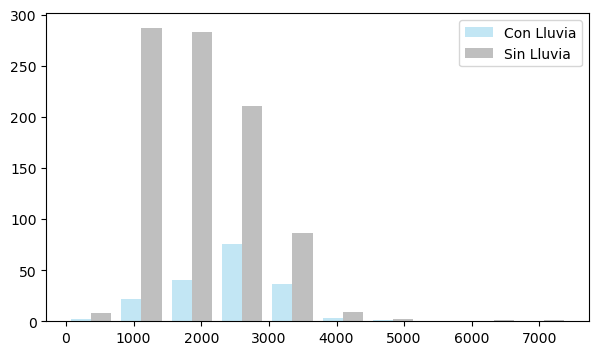

El histograma muestra ambas frecuencias a la par, aunque denotando una cantidad mayor de datos para los dias sin lluvia.
A continuacion las cantidades exactas de dias para cada condicion:
Cantidad de dias CON lluvia: 180
Cantidad de dias SIN lluvia: 888
De esto tambien podemos inferir que hay mas dias soleados que con lluvia a lo largo del año


In [8]:
# PROBAR: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare 
# cambia los sábados lluviosos".
print('Criterio: 1. Prueba de Levene para determinar igualdad de varianzas')
print('Criterio: 2. Prueba de Student (ttest_ind) para determinar igualdad de medias para dos grupos independientes de datos.')

# Codigo que muestra las medias de ambos grupos; dias lluviosos y dias soleados
print()
print('='*60)
media_dia_bueno = dfgood['duration_seconds'].mean()
media_dia_malo = dfbad['duration_seconds'].mean()
print(f'Media de {media_dia_bueno/60:.2f} minutos para dias sin lluvia.')
print(f'Media de {media_dia_malo/60:.2f} minutos para dias con lluvia.')
alpha = 0.05

# Aqui hago la prueba estadistica que determina igualdad de varianzas
print()
print('='*60)
print('VARIANZAS (Prueba Levene)')
print('Hipotesis Nula: Las varianzas entre "duracion" de viaje para dias LLUVIOSOS son la misma para los dias SIN lluvia.')
var_stat, p_value_var = st.levene(dfbad['duration_seconds'], dfgood['duration_seconds'])
if p_value_var < alpha:
    print(f'Valor p:{p_value_var:.2f}: Rechazamos Hipotesis nula. Las varianzas son distintas')
else:
    print(f'Valor p:{p_value_var:.2f}: No rechazamos la Hipotesis Nula.')

# Aqui hago la prueba estadistica que termina igualdad de medias.
print()
print('='*60)
print('Ya sabemos que las varianzas son iguales, podemos continuar a la prueba de Student:')
print('DISTINCION DE MEDIAS (t_test)')
print('Hipotesis Nula: La media de viaje para dias LLUVIOSOS es la misma que para los dias SIN lluvia.')
media, p_value_media = st.ttest_ind(dfbad['duration_seconds'], dfgood['duration_seconds'], equal_var = True)
if p_value_media < alpha:
    print(f'Valor p: {p_value_media} Rechazamos la Hipotesis, las medias son distintas.')
else:
    print(f'Valor p: {p_value_media} La media de viaje para ambas condiciones es la misma.')
    print('Con lluvia y sin lluvia llegaras a tu destino en la misma cantidad de tiempo.')
    print('Estadisticamente probado.')

# Aqui creo un histograma para que se puedan visualizar ambos conjuntos de datos
plt.figure(figsize = (7,4))
plt.hist(x = (dfbad['duration_seconds'], dfgood['duration_seconds']), color = ('skyblue', 'gray'), alpha = 0.5, bins = 10)
plt.legend(['Con Lluvia','Sin Lluvia'])
plt.show()

# Por ultimo indago en la cantidad de datos para cada condicion:
datos_lluvia = dfbad['duration_seconds'].count()
datos_soleados = dfgood['duration_seconds'].count()
print('El histograma muestra ambas frecuencias a la par, aunque denotando una cantidad mayor de datos para los dias sin lluvia.')
print('A continuacion las cantidades exactas de dias para cada condicion:')
print(f'Cantidad de dias CON lluvia: {datos_lluvia}')
print(f'Cantidad de dias SIN lluvia: {datos_soleados}')
print('De esto tambien podemos inferir que hay mas dias soleados que con lluvia a lo largo del año')

1. Mis hipotesis fueron planteadas segun la condicion (Condicion A: LLuvia, Condicion B: soleado). La hipotesis nula siempre conseradora partiendo del enunciado de la no diferencia. Para levene comence igualando ambas varianzas, siendo la hipotesis alternativa la distincion entre varianzas. Para la prueba de medias de igual manera comence por asumir que ambas medias son iguales, lo que posteriormente quedo demostrado que no, una vez finalizada la prueba de Student.
2. Dado que ambas condiciones son grupos numericos (arrays) es facil poder trabajar con las medias. Lo primero fue determinar si ambos grupos comparten varianza. Ocupando la prueba de Levene determine esta condicion. A continuacion puse a prueba la igualdad de medias de ambos grupos ocupando la prueba de Student para grupos independientes. Dado que el valor-p para la prueba de student fue tan bajo, concluyo que las medias para ambos grupos son distintas y que por tanto viajar en dias soleadas y viajar en dias con lluvia afectan la duracion del viaje.
3. Sin embargo las muestras en terminos de cantidad fueron diferentes, y este factor podria afectar toda la estadistica. tener un registro de 800 viajes soledados y 800 viajes lluviosos podria darnos una mejor evaluacion.